# Seedlings Project



In [1]:
!ls

sample_data


## Testing for GPU 


To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Download the data

by placing ! infront we can run almost any linux shell command

In [3]:
!wget -qq https://www.dropbox.com/s/nwzfqtrplgbyi5m/v2-plant-seedlings-dataset.zip?dl=0 
!unzip -qq v2-plant-seedlings-dataset.zip?dl=0 
!rm v2-plant-seedlings-dataset.zip?dl=0 
!ls

 Black-grass	    'Fat Hen'		 'Shepherd’s Purse'
 Charlock	    'Loose Silky-bent'	 'Small-flowered Cranesbill'
 Cleavers	     Maize		 'Sugar beet'
'Common Chickweed'   sample_data
'Common wheat'	    'Scentless Mayweed'


In [4]:
!ls 'Sugar beet'

100.png  148.png  195.png  241.png  289.png  336.png  383.png  42.png	58.png
101.png  149.png  196.png  242.png  290.png  337.png  384.png  430.png	59.png
102.png  14.png   197.png  243.png  291.png  338.png  385.png  431.png	5.png
103.png  150.png  198.png  244.png  292.png  339.png  386.png  432.png	60.png
104.png  151.png  199.png  245.png  293.png  33.png   387.png  433.png	61.png
105.png  152.png  19.png   246.png  294.png  340.png  388.png  434.png	62.png
106.png  153.png  1.png    247.png  295.png  341.png  389.png  435.png	63.png
107.png  154.png  200.png  248.png  296.png  342.png  38.png   436.png	64.png
108.png  155.png  201.png  249.png  297.png  343.png  390.png  437.png	65.png
109.png  156.png  202.png  24.png   298.png  344.png  391.png  438.png	66.png
10.png	 157.png  203.png  250.png  299.png  345.png  392.png  439.png	67.png
110.png  158.png  204.png  251.png  29.png   346.png  393.png  43.png	68.png
111.png  159.png  205.png  252.png  2.png    347.png  394.png  440.p

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, json
from glob import glob
import numpy as np

import keras

from tensorflow.keras import optimizers

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16


from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.models import Model,load_model,Sequential

from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.python.keras import backend as K

from tensorflow.keras.callbacks import ModelCheckpoint, Callback




Using TensorFlow backend.


In [6]:
print(tf.__version__)
print(tf.keras.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf
2.2.4


In [0]:
# Set up some Hyperparameters

batch_size = 32
epochs = 10

lr = 0.001

## Converting raw files in folders into something we can feed into tf.data

We use glob to get lists of the files in the directories and then convert them into dataframes and add in class numbers.

We also then split them up so we have 10% for a testing set and the rest for training.

finally we randomly shuffle them up



In [8]:
import glob
import pandas as pd

filenames_n0 = glob.glob('./Black-grass/*.png')
filenames_n1 = glob.glob('./Charlock/*.png')
filenames_n2 = glob.glob('./Cleavers/*.png')
filenames_n3 = glob.glob('./Common Chickweed/*.png')
filenames_n4 = glob.glob('./Common wheat/*.png')
filenames_n5 = glob.glob('./Fat Hen/*.png')
filenames_n6 = glob.glob('./Loose Silky-bent/*.png')
filenames_n7 = glob.glob('./Maize/*.png')
filenames_n8 = glob.glob('./Scentless Mayweed/*.png')
filenames_n9 = glob.glob('./Shepherd’s Purse/*.png')
filenames_n10 = glob.glob('./Small-flowered Cranesbill/*.png')
filenames_n11 = glob.glob('./Sugar beet/*.png')

names = ['Black-grass', 'Charlock','Cleavers','Common Chickweed','Common wheat',
        'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 
        'Small-flowered Cranesbill', 'Sugar beet']


len(filenames_n1)


452

In [9]:
filenames_n3[:10]

['./Common Chickweed/168.png',
 './Common Chickweed/485.png',
 './Common Chickweed/313.png',
 './Common Chickweed/644.png',
 './Common Chickweed/472.png',
 './Common Chickweed/299.png',
 './Common Chickweed/464.png',
 './Common Chickweed/67.png',
 './Common Chickweed/501.png',
 './Common Chickweed/516.png']

In [10]:
# Make a dataframe based on the filenames
df = pd.DataFrame(filenames_n0, columns = ["filename"])
df1 = pd.DataFrame(filenames_n1, columns = ["filename"])
df2 = pd.DataFrame(filenames_n2, columns = ["filename"])
df3 = pd.DataFrame(filenames_n3, columns = ["filename"])
df4 = pd.DataFrame(filenames_n4, columns = ["filename"])
df5 = pd.DataFrame(filenames_n5, columns = ["filename"])
df6 = pd.DataFrame(filenames_n6, columns = ["filename"])
df7 = pd.DataFrame(filenames_n7, columns = ["filename"])
df8 = pd.DataFrame(filenames_n8, columns = ["filename"])
df9 = pd.DataFrame(filenames_n9, columns = ["filename"])
df10 = pd.DataFrame(filenames_n10, columns = ["filename"])
df11 = pd.DataFrame(filenames_n11, columns = ["filename"])

df.head()

,filename
0,./Black-grass/313.png
1,./Black-grass/67.png
2,./Black-grass/68.png
3,./Black-grass/329.png
4,./Black-grass/273.png


In [0]:

# Add Class columns 
df['class'] = pd.Series([0 for x in range(len(df.index))], index=df.index)
df1['class'] = pd.Series([1 for x in range(len(df1.index))], index=df1.index)
df2['class'] = pd.Series([2 for x in range(len(df2.index))], index=df2.index)
df3['class'] = pd.Series([3 for x in range(len(df3.index))], index=df3.index)
df4['class'] = pd.Series([4 for x in range(len(df4.index))], index=df4.index)
df5['class'] = pd.Series([5 for x in range(len(df5.index))], index=df5.index)
df6['class'] = pd.Series([6 for x in range(len(df6.index))], index=df6.index)
df7['class'] = pd.Series([7 for x in range(len(df7.index))], index=df7.index)
df8['class'] = pd.Series([8 for x in range(len(df8.index))], index=df8.index)
df9['class'] = pd.Series([9 for x in range(len(df9.index))], index=df9.index)
df10['class'] = pd.Series([10 for x in range(len(df10.index))], index=df10.index)
df11['class'] = pd.Series([11 for x in range(len(df11.index))], index=df11.index)

In [12]:
df3.head()

,filename,class
0,./Common Chickweed/168.png,3
1,./Common Chickweed/485.png,3
2,./Common Chickweed/313.png,3
3,./Common Chickweed/644.png,3
4,./Common Chickweed/472.png,3


In [0]:


# Split into train and validation sets
train_set_percentage = .9

train_df = df[:int(len(df)*train_set_percentage)]
val_df = df[int(len(df)*train_set_percentage):]

train_df1 = df[:int(len(df1)*train_set_percentage)]
val_df1 = df[int(len(df1)*train_set_percentage):]

train_df2 = df2[:int(len(df2)*train_set_percentage)]
val_df2 = df2[int(len(df2)*train_set_percentage):]

train_df3 = df3[:int(len(df3)*train_set_percentage)]
val_df3 = df3[int(len(df3)*train_set_percentage):]

train_df4 = df4[:int(len(df4)*train_set_percentage)]
val_df4 = df4[int(len(df4)*train_set_percentage):]

train_df5 = df5[:int(len(df5)*train_set_percentage)]
val_df5 = df5[int(len(df5)*train_set_percentage):]

train_df6 = df6[:int(len(df6)*train_set_percentage)]
val_df6 = df6[int(len(df6)*train_set_percentage):]

train_df7 = df7[:int(len(df7)*train_set_percentage)]
val_df7 = df7[int(len(df7)*train_set_percentage):]

train_df8 = df8[:int(len(df8)*train_set_percentage)]
val_df8 = df8[int(len(df8)*train_set_percentage):]

train_df9 = df9[:int(len(df9)*train_set_percentage)]
val_df9 = df9[int(len(df9)*train_set_percentage):]

train_df10 = df10[:int(len(df10)*train_set_percentage)]
val_df10 = df10[int(len(df10)*train_set_percentage):]

train_df11 = df11[:int(len(df11)*train_set_percentage)]
val_df11 = df11[int(len(df11)*train_set_percentage):]


df_new_train = pd.concat([train_df, train_df1, train_df2, train_df3, train_df4, 
                          train_df5, train_df6, train_df7, train_df8, train_df9,
                          train_df10, train_df11])
df_new_val = pd.concat([val_df, val_df1, val_df2, val_df3, val_df4, val_df5,
                       val_df6, val_df7, val_df8, val_df9, val_df10,
                       val_df11])

df_new_train.shape

#shuffle
df = df_new_train.sample(frac=1).reset_index(drop=True)
df_val = df_new_val.sample(frac=1).reset_index(drop=True)

# Examine the Dataset

lets look at what we have now. 

In [14]:
df.head()

,filename,class
0,./Fat Hen/148.png,5
1,./Maize/66.png,7
2,./Common wheat/192.png,4
3,./Shepherd’s Purse/140.png,9
4,./Loose Silky-bent/780.png,6


In [15]:
print(df.shape)
print(df_val.shape)

df['class'].unique()

(4882, 2)
(514, 2)


array([ 5,  7,  4,  9,  6,  0,  3,  8,  2, 11, 10])

6     685
3     641
0     587
8     546
10    518
5     484
11    416
2     301
9     246
7     231
4     227
Name: class, dtype: int64


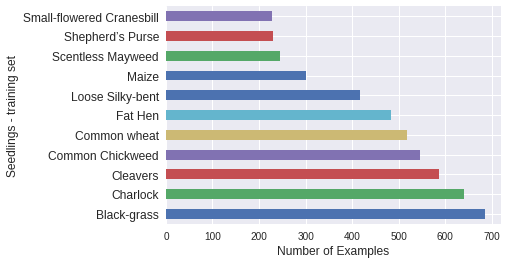

In [16]:
print(df['class'].value_counts())


ax = df['class'].value_counts().plot.barh()
ax.set_xlabel("Number of Examples", fontsize=12)
ax.set_ylabel("Seedlings - training set", fontsize=12)
ax.set_yticklabels(['Black-grass', 'Charlock','Cleavers','Common Chickweed','Common wheat',
        'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 
        'Small-flowered Cranesbill', 'Sugar beet'], rotation=0, fontsize=12)
plt.show()

In [17]:
# convert the dataframe into 2 lists to use for filename and labels
train_filenames_list = df["filename"].tolist()
train_labels_list = df["class"].astype('int32').tolist()

# convert the dataframe into 2 lists to use for filename and labels
val_filenames_list = df_val["filename"].tolist()
val_labels_list = df_val["class"].astype('int32').tolist()

#number of classes
num_classes = 5

df.shape

(4882, 2)

## Make the pipeline for loading and resizing the images

In [0]:
# Reads an image from a file, decodes it into a tensor, and resizes it
# to a fixed shape.
img_rows, img_cols = 299,299

def _parse_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_png(image_string, channels=3)
  image_resized = tf.image.resize_images(image_decoded, [img_rows, img_cols])
  label = tf.one_hot(label, num_classes)
  return image_resized, label

In [0]:
# A vector of filenames - from a list
filenames = tf.constant(train_filenames_list)

# Labels that match the training files - from a list
labels = tf.constant(train_labels_list)

# Same as above but for validation set
val_filenames = tf.constant(val_filenames_list)
val_labels = tf.constant(val_labels_list)

## Assembling the Data pipeline using tf.data

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
train_dataset = train_dataset.map(_parse_function)
train_dataset = train_dataset.repeat(100)
train_dataset = train_dataset.batch(32)

In [0]:
valid_dataset = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))
valid_dataset = valid_dataset.map(_parse_function)
valid_dataset = valid_dataset.repeat(100)
valid_dataset = valid_dataset.batch(32)

## Create the network




In [22]:
# InceptionV3 Model - trained on image net
# Base model
base_model = InceptionV3(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 2s 0us/step


In [0]:
#model.summary()

In [24]:
# If you use InceptionV3 you must freeze the weights layers but not batchnorm layers: un comment the following

# Freeze the InceptionV3 layers except the BatchNorm
for layer in base_model.layers:
    if 'batch' in layer.name:
#       print(layer.name)
      layer.trainable = True
    else:
      layer.trainable = False 

batch_normalization_v1
batch_normalization_v1_1
batch_normalization_v1_2
batch_normalization_v1_3
batch_normalization_v1_4
batch_normalization_v1_8
batch_normalization_v1_6
batch_normalization_v1_9
batch_normalization_v1_5
batch_normalization_v1_7
batch_normalization_v1_10
batch_normalization_v1_11
batch_normalization_v1_15
batch_normalization_v1_13
batch_normalization_v1_16
batch_normalization_v1_12
batch_normalization_v1_14
batch_normalization_v1_17
batch_normalization_v1_18
batch_normalization_v1_22
batch_normalization_v1_20
batch_normalization_v1_23
batch_normalization_v1_19
batch_normalization_v1_21
batch_normalization_v1_24
batch_normalization_v1_25
batch_normalization_v1_27
batch_normalization_v1_28
batch_normalization_v1_26
batch_normalization_v1_29
batch_normalization_v1_34
batch_normalization_v1_35
batch_normalization_v1_31
batch_normalization_v1_36
batch_normalization_v1_32
batch_normalization_v1_37
batch_normalization_v1_30
batch_normalization_v1_33
batch_normalization_v1_3

## Create a simple head for the model that we can train

In [0]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# classes for characters
predictions = Dense(num_classes, activation='softmax')(x)

In [0]:
# Creating the model that we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
# Freeze the InceptionV3 layers except the BatchNorm
for layer in base_model.layers:
    if 'batch' in layer.name:
#       print(layer.name)
      layer.trainable = True
    else:
      layer.trainable = False 

## Select an Optimizer 

In [0]:
# creates the optimizer using a tensorFlow optimizer with lr setting the Learning Rate

# tf.keras optimizer
opt = optimizers.Adam(lr)

# We could use a TensorFlow Optimizer but they can't save the weight as a whole
# opt = tf.train.AdamOptimizer(lr)

## Compile the model

In [0]:
# compile the model 

model.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

## Call backs

In [0]:
!mkdir checkpoints


checkpoint = ModelCheckpoint('./checkpoints/weights_{epoch:02d}_{val_acc:.2f}.hdf5', verbose=1, save_best_only=True, mode='auto')

Steps = 3888 / batch_size

In [31]:
train_steps = 100
val_steps = 100
epochs = 10

print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 100
val steps: 100


## Fit the model

we pass in:
- The training set
- the steps for how many times we want to sample a batch to be one epoch
- number of epochs
- validation set
- number of steps for validation

In [32]:
# # Train the model with validation 
history = model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 99/100 [============================>.] - ETA: 1s - loss: 0.2348 - acc: 0.4848
Epoch 00001: val_loss improved from inf to 0.20149, saving model to ./checkpoints/weights_01_0.43.hdf5
100/100 [==============================] - 201s 2s/step - loss: 0.2340 - acc: 0.4863 - val_loss: 0.2015 - val_acc: 0.4338
Epoch 2/10
 99/100 [============================>.] - ETA: 1s - loss: 0.1006 - acc: 0.5357
Epoch 00002: val_loss improved from 0.20149 to 0.04287, saving model to ./checkpoints/weights_02_0.48.hdf5
100/100 [==============================] - 151s 2s/step - loss: 0.0999 - acc: 0.5359 - val_loss: 0.0429 - val_acc: 0.4794
Epoch 3/10
 99/100 [============================>.] - ETA: 1s - loss: 0.0625 - acc: 0.5622
Epoch 00003: val_loss did not improve from 0.04287
100/100 [==============================] - 152s 2s/step - loss: 0.0622 - acc: 0.5619 - val_loss: 0.0493 - val_acc: 0.4913
Epoch 4/10
 99/100 [============================>.] 

In [33]:
!ls checkpoints

weights_01_0.43.hdf5  weights_05_0.49.hdf5  weights_09_0.49.hdf5
weights_02_0.48.hdf5  weights_07_0.52.hdf5


In [34]:
metrics = model.evaluate(valid_dataset,steps=50)
print("model accuracy:",metrics[1])

50/50 [==============================] - 27s 535ms/step - loss: 0.1001 - acc: 0.6300
model accuracy: 0.63


In [0]:
# model.load_weights('./checkpoints/weights_05_0.93.hdf5')

### Make some predictions

In [37]:
preds = model.predict(valid_dataset,steps=10)
preds = preds.argmax(axis=-1)

preds.shape

(320,)

In [38]:
test_labels = val_labels_list[0:320]
len(test_labels)

320

### Make a Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_labels,preds)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.08333333 0.02083333 0.89583333 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.23076923 0.         0.         0.76923077 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.51851852 0.40740741 0.07407407 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.16666667 0.44444444 0.22222222 0.16666667 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.42857143 0.05714286 0.51428571 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.19047619 0.14285714 0.61

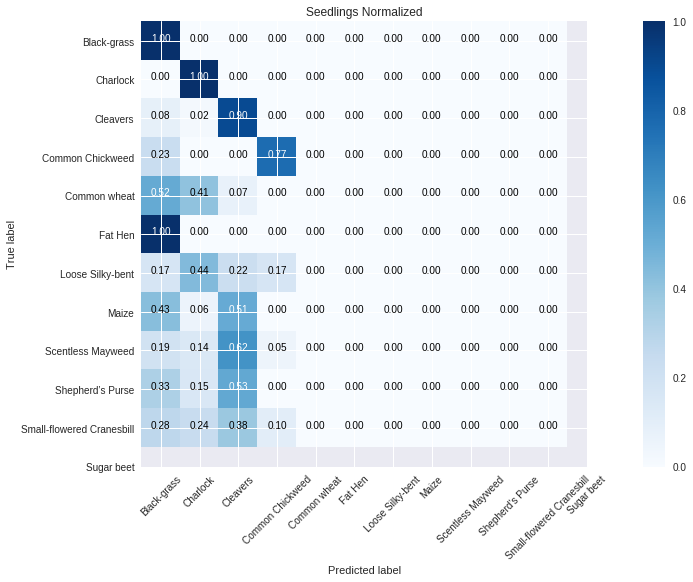

In [41]:
cm_plot_labels = names

# # Plot normalized confusion matrix
plt.figure(figsize=(16,8))
plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                      title='Seedlings Normalized')

plt.show()

### Save the Model and weights

In [0]:
model.save('seedlings.h5')

In [0]:
model.save_weights('seedlings_weights.h5', save_format='h5')

In [44]:
!ls

 Black-grass	    'Fat Hen'		  seedlings_weights.h5
 Charlock	    'Loose Silky-bent'	 'Shepherd’s Purse'
 checkpoints	     Maize		 'Small-flowered Cranesbill'
 Cleavers	     sample_data	 'Sugar beet'
'Common Chickweed'  'Scentless Mayweed'
'Common wheat'	     seedlings.h5


In [45]:
model.save_weights('./seedlings_tf')


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [46]:
!ls

 Black-grass	     sample_data
 Charlock	    'Scentless Mayweed'
 checkpoint	     seedlings.h5
 checkpoints	     seedlings_tf.data-00000-of-00001
 Cleavers	     seedlings_tf.index
'Common Chickweed'   seedlings_weights.h5
'Common wheat'	    'Shepherd’s Purse'
'Fat Hen'	    'Small-flowered Cranesbill'
'Loose Silky-bent'  'Sugar beet'
 Maize


In [0]:
# model = load_model('flowers.h5')

### Make some predictions

In [65]:
df_val.head()

,filename,class
0,./Black-grass/102.png,0
1,./Sugar beet/129.png,11
2,./Loose Silky-bent/718.png,6
3,./Cleavers/343.png,2
4,./Loose Silky-bent/677.png,6


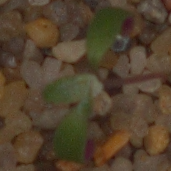

In [60]:
from IPython.display import Image

image_path = df_val['filename'][5]
# image_name = './Cleavers/343.png'
# Image(image_path+image_name)
Image(image_path)

In [62]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

# img_path = os.path.join(image_path, image_name)
# img = image.load_img(img_path, target_size=(299, 299))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# # x = preprocess_input(x)
# print('Input image shape:', x.shape)


img_path = os.path.join(image_path)
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 299, 299, 3)


In [63]:
pred = model.predict(x)
print('Predicted:', pred)

print(np.argmax(pred))

Predicted: [[9.9958581e-01 3.0958158e-09 4.0898303e-04 2.4658764e-06 2.6997282e-06]]
0


In [66]:
result= np.argmax(pred)
if result==0:
    print('Its Black-grass')
elif result==1:
    print('Its Charlock')
elif result==2:
    print('Its Cleavers')
elif result==3:
    print('Its Common Chickweed')
elif result==4:
    print('Its Common wheat')
elif result==5:
    print('Its Fat Hen')
elif result==6:
    print('Its Loose Silky-bent')
elif result==7:
    print('Its Maize')
elif result==8:
    print('Its Scentless Mayweed')    
elif result==9:
    print('Its Sheperds Purse')
elif result==10:
    print('Its Small-flowered Cranesbill')
elif result==11:
    print('Its Sugar beet')      
    

Its Black-grass


### Saving the model and weights back to local machine

In [0]:
# Downloading from colab to local machine

from google.colab import files

files.download('seedlings.h5')  